# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## Let's get started!
  
To start, let's import the necessary libraries required for this simuation:.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas
import matplotlib.pyplot as plt

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control means i.e. H0 is equal to H1

And the alternative Hypothesis:

    There is a difference between experimental and control means i.e. H0 is not equal to H1

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll a power analysis simulation.

In [4]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0.0
control_sd = 0.21

# Experimental group
experimental_mean = 0.17
experimental_sd = 0.21

#Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our `p` array. Perform following tasks.

* Initialize a numpy array and fill it with Nan values for storing the results (p_value) of the independance T-test.
* For defined number of simulations (i.e. 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independant t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected


In [5]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for i in range(n_sim):
    sample1 = np.random.normal(control_mean, control_sd,sample_size)
    sample2 = np.random.normal(experimental_mean, experimental_sd,sample_size)
    ttest = stats.ttest_ind(sample1, sample2)
    p[i] = ttest[1]
    # number of null hypothesis rejections
    
num_null_rejects = sum(p <0.05)
reject_proportion = num_null_rejects/n_sim

reject_proportion

# 0.495

0.495

These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experimetn is 49%. This can be interpreted as follows:

> **If a large effect (.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research .8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of .17 or greater between the group means with an 80% power.

In [23]:
# required power 0.95
target = 0.95

In [25]:
def get_power(sample_size, n_sim,alpha = 0.05):
    p = (np.empty(n_sim))
    p.fill(np.nan)

#  Run a for loop for range of values in n_sim
    for i in range(n_sim):
        sample1 = np.random.normal(control_mean, control_sd,sample_size)
        sample2 = np.random.normal(experimental_mean, experimental_sd,sample_size)
        ttest = stats.ttest_ind(sample1, sample2)
        p[i] = ttest[1]
    # number of null hypothesis rejections
    
    num_null_rejects = sum(p <alpha)
    reject_proportion = num_null_rejects/n_sim
    return reject_proportion

In [ ]:
# minimum sample size to start the simulations 
target = 0.95
sample_size = 12
current = 0
n_sim = 1000
alpha = 0.05
power = 0
results = {}
while power <target:
    power = get_power(sample_size, n_sim, alpha)
    sample_size +=1
    print(f"sample_size : {sample_size} , power {power}")
    results[sample_size] = power
needed_sample_size = sample_size

sample_size : 13 , power 0.093
sample_size : 14 , power 0.108
sample_size : 15 , power 0.109
sample_size : 16 , power 0.102
sample_size : 17 , power 0.097
sample_size : 18 , power 0.098
sample_size : 19 , power 0.109
sample_size : 20 , power 0.116
sample_size : 21 , power 0.147
sample_size : 22 , power 0.12
sample_size : 23 , power 0.11
sample_size : 24 , power 0.112
sample_size : 25 , power 0.139
sample_size : 26 , power 0.134
sample_size : 27 , power 0.16
sample_size : 28 , power 0.155
sample_size : 29 , power 0.168
sample_size : 30 , power 0.154
sample_size : 31 , power 0.145
sample_size : 32 , power 0.136
sample_size : 33 , power 0.177
sample_size : 34 , power 0.173
sample_size : 35 , power 0.174
sample_size : 36 , power 0.173
sample_size : 37 , power 0.175
sample_size : 38 , power 0.182
sample_size : 39 , power 0.198
sample_size : 40 , power 0.174
sample_size : 41 , power 0.195
sample_size : 42 , power 0.201
sample_size : 43 , power 0.209
sample_size : 44 , power 0.208
sample_size

In [2]:
import pandas as pd
df = pd.DataFrame.from_dict(results, orient = 'index', columns = ["power"])
print(f"Minimum Sample_Size needed for resulting Power of:{target} is :{needed_sample_size}")

NameError: name 'results' is not defined

As above, perform the following

* Initialize an empty array for storing results
* initiliaze a list for storing samplesize x power summary
* While current power is less than target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size , power
    * increase the sample size by 1 and repeat

You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

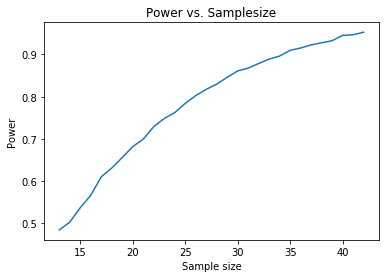

In [47]:
# Plot a sample size X Power line graph 
df.power.plot.line()
plt.title("Power vs. Samplesize")
plt.ylabel("Power")
plt.xlabel("Sample size")
plt.show();

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need considerably higher number of patients. 

# attempt Bonus

In [15]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def set_effect_size(effect_size, sd = 0.2):
    control_mean = 0.0
    control_sd = sd

    # Experimental group
    experimental_mean = control_mean + effect_size
    experimental_sd = sd
    return control_mean,control_sd,experimental_mean,experimental_sd

In [17]:
def get_power(sample_size, n_sim,effect_size, alpha = 0.05):
    control_mean, control_sd, experimental_mean, experimental_sd = set_effect_size(effect_size, sd = 0.2)
    p = (np.empty(n_sim))
    p.fill(np.nan)

#  Run a for loop for range of values in n_sim
    for i in range(n_sim):
        sample1 = np.random.normal(control_mean, control_sd,sample_size)
        sample2 = np.random.normal(experimental_mean, experimental_sd,sample_size)
        ttest = stats.ttest_ind(sample1, sample2)
        p[i] = ttest[1]
    # number of null hypothesis rejections
    
    num_null_rejects = sum(p <alpha)
    reject_proportion = num_null_rejects/n_sim
    return reject_proportion

In [18]:
def power_exp(target, sample_size, n_sim, effect_size, max_size = 500, alpha = 0.05):
    results = {}
    power = 0
    target = target
    sample_size = sample_size
    while (sample_size < 500):
        power = get_power(sample_size, n_sim, alpha = alpha, effect_size = effect_size)
        sample_size +=1
        print(f"effect_size: {effect_size} , sample_size : {sample_size} , power {power}")
    results[sample_size] = power
    df = pd.DataFrame.from_dict(results, orient = 'index', columns = ["power"+str(effect_size)])
    return(df)

In [19]:
target = 1.1
sample_size = 10
n_sim = 10
effect_sizes = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
max_size = 500
df_list = []
for effect_size in effect_sizes:
    print(effect_size)
    df_list.append(power_exp(target,sample_size,n_sim,effect_size,max_size, alpha = 0.05))
    

0.01
effect_size: 0.01 , sample_size : 11 , power 0.0
effect_size: 0.01 , sample_size : 12 , power 0.0
effect_size: 0.01 , sample_size : 13 , power 0.0
effect_size: 0.01 , sample_size : 14 , power 0.0
effect_size: 0.01 , sample_size : 15 , power 0.0
effect_size: 0.01 , sample_size : 16 , power 0.0
effect_size: 0.01 , sample_size : 17 , power 0.0
effect_size: 0.01 , sample_size : 18 , power 0.1
effect_size: 0.01 , sample_size : 19 , power 0.3
effect_size: 0.01 , sample_size : 20 , power 0.0
effect_size: 0.01 , sample_size : 21 , power 0.0
effect_size: 0.01 , sample_size : 22 , power 0.1
effect_size: 0.01 , sample_size : 23 , power 0.0
effect_size: 0.01 , sample_size : 24 , power 0.1
effect_size: 0.01 , sample_size : 25 , power 0.0
effect_size: 0.01 , sample_size : 26 , power 0.0
effect_size: 0.01 , sample_size : 27 , power 0.0
effect_size: 0.01 , sample_size : 28 , power 0.0
effect_size: 0.01 , sample_size : 29 , power 0.0
effect_size: 0.01 , sample_size : 30 , power 0.0
effect_size: 0.

effect_size: 0.01 , sample_size : 221 , power 0.1
effect_size: 0.01 , sample_size : 222 , power 0.1
effect_size: 0.01 , sample_size : 223 , power 0.0
effect_size: 0.01 , sample_size : 224 , power 0.2
effect_size: 0.01 , sample_size : 225 , power 0.0
effect_size: 0.01 , sample_size : 226 , power 0.1
effect_size: 0.01 , sample_size : 227 , power 0.0
effect_size: 0.01 , sample_size : 228 , power 0.1
effect_size: 0.01 , sample_size : 229 , power 0.0
effect_size: 0.01 , sample_size : 230 , power 0.0
effect_size: 0.01 , sample_size : 231 , power 0.0
effect_size: 0.01 , sample_size : 232 , power 0.0
effect_size: 0.01 , sample_size : 233 , power 0.3
effect_size: 0.01 , sample_size : 234 , power 0.1
effect_size: 0.01 , sample_size : 235 , power 0.3
effect_size: 0.01 , sample_size : 236 , power 0.0
effect_size: 0.01 , sample_size : 237 , power 0.0
effect_size: 0.01 , sample_size : 238 , power 0.2
effect_size: 0.01 , sample_size : 239 , power 0.1
effect_size: 0.01 , sample_size : 240 , power 0.1


effect_size: 0.01 , sample_size : 422 , power 0.1
effect_size: 0.01 , sample_size : 423 , power 0.1
effect_size: 0.01 , sample_size : 424 , power 0.2
effect_size: 0.01 , sample_size : 425 , power 0.1
effect_size: 0.01 , sample_size : 426 , power 0.0
effect_size: 0.01 , sample_size : 427 , power 0.1
effect_size: 0.01 , sample_size : 428 , power 0.2
effect_size: 0.01 , sample_size : 429 , power 0.2
effect_size: 0.01 , sample_size : 430 , power 0.0
effect_size: 0.01 , sample_size : 431 , power 0.1
effect_size: 0.01 , sample_size : 432 , power 0.1
effect_size: 0.01 , sample_size : 433 , power 0.1
effect_size: 0.01 , sample_size : 434 , power 0.2
effect_size: 0.01 , sample_size : 435 , power 0.3
effect_size: 0.01 , sample_size : 436 , power 0.1
effect_size: 0.01 , sample_size : 437 , power 0.1
effect_size: 0.01 , sample_size : 438 , power 0.1
effect_size: 0.01 , sample_size : 439 , power 0.0
effect_size: 0.01 , sample_size : 440 , power 0.1
effect_size: 0.01 , sample_size : 441 , power 0.0


effect_size: 0.05 , sample_size : 132 , power 0.6
effect_size: 0.05 , sample_size : 133 , power 0.5
effect_size: 0.05 , sample_size : 134 , power 0.4
effect_size: 0.05 , sample_size : 135 , power 0.4
effect_size: 0.05 , sample_size : 136 , power 0.6
effect_size: 0.05 , sample_size : 137 , power 0.5
effect_size: 0.05 , sample_size : 138 , power 0.3
effect_size: 0.05 , sample_size : 139 , power 0.6
effect_size: 0.05 , sample_size : 140 , power 0.6
effect_size: 0.05 , sample_size : 141 , power 0.5
effect_size: 0.05 , sample_size : 142 , power 0.3
effect_size: 0.05 , sample_size : 143 , power 0.5
effect_size: 0.05 , sample_size : 144 , power 0.7
effect_size: 0.05 , sample_size : 145 , power 0.4
effect_size: 0.05 , sample_size : 146 , power 0.4
effect_size: 0.05 , sample_size : 147 , power 0.9
effect_size: 0.05 , sample_size : 148 , power 0.7
effect_size: 0.05 , sample_size : 149 , power 0.8
effect_size: 0.05 , sample_size : 150 , power 0.5
effect_size: 0.05 , sample_size : 151 , power 0.9


effect_size: 0.05 , sample_size : 328 , power 1.0
effect_size: 0.05 , sample_size : 329 , power 0.9
effect_size: 0.05 , sample_size : 330 , power 0.8
effect_size: 0.05 , sample_size : 331 , power 1.0
effect_size: 0.05 , sample_size : 332 , power 0.8
effect_size: 0.05 , sample_size : 333 , power 1.0
effect_size: 0.05 , sample_size : 334 , power 0.9
effect_size: 0.05 , sample_size : 335 , power 1.0
effect_size: 0.05 , sample_size : 336 , power 0.9
effect_size: 0.05 , sample_size : 337 , power 0.7
effect_size: 0.05 , sample_size : 338 , power 1.0
effect_size: 0.05 , sample_size : 339 , power 0.9
effect_size: 0.05 , sample_size : 340 , power 0.7
effect_size: 0.05 , sample_size : 341 , power 1.0
effect_size: 0.05 , sample_size : 342 , power 0.8
effect_size: 0.05 , sample_size : 343 , power 0.9
effect_size: 0.05 , sample_size : 344 , power 1.0
effect_size: 0.05 , sample_size : 345 , power 0.9
effect_size: 0.05 , sample_size : 346 , power 1.0
effect_size: 0.05 , sample_size : 347 , power 0.9


effect_size: 0.1 , sample_size : 26 , power 0.6
effect_size: 0.1 , sample_size : 27 , power 0.6
effect_size: 0.1 , sample_size : 28 , power 0.4
effect_size: 0.1 , sample_size : 29 , power 0.5
effect_size: 0.1 , sample_size : 30 , power 0.3
effect_size: 0.1 , sample_size : 31 , power 0.6
effect_size: 0.1 , sample_size : 32 , power 0.2
effect_size: 0.1 , sample_size : 33 , power 0.4
effect_size: 0.1 , sample_size : 34 , power 0.6
effect_size: 0.1 , sample_size : 35 , power 0.7
effect_size: 0.1 , sample_size : 36 , power 0.8
effect_size: 0.1 , sample_size : 37 , power 0.4
effect_size: 0.1 , sample_size : 38 , power 0.7
effect_size: 0.1 , sample_size : 39 , power 0.2
effect_size: 0.1 , sample_size : 40 , power 0.7
effect_size: 0.1 , sample_size : 41 , power 0.7
effect_size: 0.1 , sample_size : 42 , power 0.8
effect_size: 0.1 , sample_size : 43 , power 0.7
effect_size: 0.1 , sample_size : 44 , power 0.6
effect_size: 0.1 , sample_size : 45 , power 0.7
effect_size: 0.1 , sample_size : 46 , po

effect_size: 0.1 , sample_size : 234 , power 1.0
effect_size: 0.1 , sample_size : 235 , power 1.0
effect_size: 0.1 , sample_size : 236 , power 1.0
effect_size: 0.1 , sample_size : 237 , power 1.0
effect_size: 0.1 , sample_size : 238 , power 1.0
effect_size: 0.1 , sample_size : 239 , power 1.0
effect_size: 0.1 , sample_size : 240 , power 1.0
effect_size: 0.1 , sample_size : 241 , power 1.0
effect_size: 0.1 , sample_size : 242 , power 1.0
effect_size: 0.1 , sample_size : 243 , power 1.0
effect_size: 0.1 , sample_size : 244 , power 1.0
effect_size: 0.1 , sample_size : 245 , power 1.0
effect_size: 0.1 , sample_size : 246 , power 1.0
effect_size: 0.1 , sample_size : 247 , power 1.0
effect_size: 0.1 , sample_size : 248 , power 1.0
effect_size: 0.1 , sample_size : 249 , power 1.0
effect_size: 0.1 , sample_size : 250 , power 1.0
effect_size: 0.1 , sample_size : 251 , power 1.0
effect_size: 0.1 , sample_size : 252 , power 1.0
effect_size: 0.1 , sample_size : 253 , power 1.0
effect_size: 0.1 , s

effect_size: 0.1 , sample_size : 420 , power 1.0
effect_size: 0.1 , sample_size : 421 , power 1.0
effect_size: 0.1 , sample_size : 422 , power 1.0
effect_size: 0.1 , sample_size : 423 , power 1.0
effect_size: 0.1 , sample_size : 424 , power 1.0
effect_size: 0.1 , sample_size : 425 , power 1.0
effect_size: 0.1 , sample_size : 426 , power 1.0
effect_size: 0.1 , sample_size : 427 , power 1.0
effect_size: 0.1 , sample_size : 428 , power 1.0
effect_size: 0.1 , sample_size : 429 , power 1.0
effect_size: 0.1 , sample_size : 430 , power 1.0
effect_size: 0.1 , sample_size : 431 , power 1.0
effect_size: 0.1 , sample_size : 432 , power 1.0
effect_size: 0.1 , sample_size : 433 , power 1.0
effect_size: 0.1 , sample_size : 434 , power 1.0
effect_size: 0.1 , sample_size : 435 , power 1.0
effect_size: 0.1 , sample_size : 436 , power 1.0
effect_size: 0.1 , sample_size : 437 , power 1.0
effect_size: 0.1 , sample_size : 438 , power 1.0
effect_size: 0.1 , sample_size : 439 , power 1.0
effect_size: 0.1 , s

effect_size: 0.15 , sample_size : 135 , power 1.0
effect_size: 0.15 , sample_size : 136 , power 1.0
effect_size: 0.15 , sample_size : 137 , power 1.0
effect_size: 0.15 , sample_size : 138 , power 1.0
effect_size: 0.15 , sample_size : 139 , power 1.0
effect_size: 0.15 , sample_size : 140 , power 1.0
effect_size: 0.15 , sample_size : 141 , power 1.0
effect_size: 0.15 , sample_size : 142 , power 1.0
effect_size: 0.15 , sample_size : 143 , power 1.0
effect_size: 0.15 , sample_size : 144 , power 1.0
effect_size: 0.15 , sample_size : 145 , power 1.0
effect_size: 0.15 , sample_size : 146 , power 1.0
effect_size: 0.15 , sample_size : 147 , power 1.0
effect_size: 0.15 , sample_size : 148 , power 1.0
effect_size: 0.15 , sample_size : 149 , power 1.0
effect_size: 0.15 , sample_size : 150 , power 1.0
effect_size: 0.15 , sample_size : 151 , power 1.0
effect_size: 0.15 , sample_size : 152 , power 1.0
effect_size: 0.15 , sample_size : 153 , power 1.0
effect_size: 0.15 , sample_size : 154 , power 1.0


effect_size: 0.15 , sample_size : 335 , power 1.0
effect_size: 0.15 , sample_size : 336 , power 1.0
effect_size: 0.15 , sample_size : 337 , power 1.0
effect_size: 0.15 , sample_size : 338 , power 1.0
effect_size: 0.15 , sample_size : 339 , power 1.0
effect_size: 0.15 , sample_size : 340 , power 1.0
effect_size: 0.15 , sample_size : 341 , power 1.0
effect_size: 0.15 , sample_size : 342 , power 1.0
effect_size: 0.15 , sample_size : 343 , power 1.0
effect_size: 0.15 , sample_size : 344 , power 1.0
effect_size: 0.15 , sample_size : 345 , power 1.0
effect_size: 0.15 , sample_size : 346 , power 1.0
effect_size: 0.15 , sample_size : 347 , power 1.0
effect_size: 0.15 , sample_size : 348 , power 1.0
effect_size: 0.15 , sample_size : 349 , power 1.0
effect_size: 0.15 , sample_size : 350 , power 1.0
effect_size: 0.15 , sample_size : 351 , power 1.0
effect_size: 0.15 , sample_size : 352 , power 1.0
effect_size: 0.15 , sample_size : 353 , power 1.0
effect_size: 0.15 , sample_size : 354 , power 1.0


effect_size: 0.2 , sample_size : 50 , power 1.0
effect_size: 0.2 , sample_size : 51 , power 1.0
effect_size: 0.2 , sample_size : 52 , power 1.0
effect_size: 0.2 , sample_size : 53 , power 1.0
effect_size: 0.2 , sample_size : 54 , power 1.0
effect_size: 0.2 , sample_size : 55 , power 1.0
effect_size: 0.2 , sample_size : 56 , power 1.0
effect_size: 0.2 , sample_size : 57 , power 1.0
effect_size: 0.2 , sample_size : 58 , power 1.0
effect_size: 0.2 , sample_size : 59 , power 1.0
effect_size: 0.2 , sample_size : 60 , power 1.0
effect_size: 0.2 , sample_size : 61 , power 1.0
effect_size: 0.2 , sample_size : 62 , power 1.0
effect_size: 0.2 , sample_size : 63 , power 1.0
effect_size: 0.2 , sample_size : 64 , power 1.0
effect_size: 0.2 , sample_size : 65 , power 1.0
effect_size: 0.2 , sample_size : 66 , power 1.0
effect_size: 0.2 , sample_size : 67 , power 1.0
effect_size: 0.2 , sample_size : 68 , power 1.0
effect_size: 0.2 , sample_size : 69 , power 1.0
effect_size: 0.2 , sample_size : 70 , po

effect_size: 0.2 , sample_size : 237 , power 1.0
effect_size: 0.2 , sample_size : 238 , power 1.0
effect_size: 0.2 , sample_size : 239 , power 1.0
effect_size: 0.2 , sample_size : 240 , power 1.0
effect_size: 0.2 , sample_size : 241 , power 1.0
effect_size: 0.2 , sample_size : 242 , power 1.0
effect_size: 0.2 , sample_size : 243 , power 1.0
effect_size: 0.2 , sample_size : 244 , power 1.0
effect_size: 0.2 , sample_size : 245 , power 1.0
effect_size: 0.2 , sample_size : 246 , power 1.0
effect_size: 0.2 , sample_size : 247 , power 1.0
effect_size: 0.2 , sample_size : 248 , power 1.0
effect_size: 0.2 , sample_size : 249 , power 1.0
effect_size: 0.2 , sample_size : 250 , power 1.0
effect_size: 0.2 , sample_size : 251 , power 1.0
effect_size: 0.2 , sample_size : 252 , power 1.0
effect_size: 0.2 , sample_size : 253 , power 1.0
effect_size: 0.2 , sample_size : 254 , power 1.0
effect_size: 0.2 , sample_size : 255 , power 1.0
effect_size: 0.2 , sample_size : 256 , power 1.0
effect_size: 0.2 , s

effect_size: 0.2 , sample_size : 432 , power 1.0
effect_size: 0.2 , sample_size : 433 , power 1.0
effect_size: 0.2 , sample_size : 434 , power 1.0
effect_size: 0.2 , sample_size : 435 , power 1.0
effect_size: 0.2 , sample_size : 436 , power 1.0
effect_size: 0.2 , sample_size : 437 , power 1.0
effect_size: 0.2 , sample_size : 438 , power 1.0
effect_size: 0.2 , sample_size : 439 , power 1.0
effect_size: 0.2 , sample_size : 440 , power 1.0
effect_size: 0.2 , sample_size : 441 , power 1.0
effect_size: 0.2 , sample_size : 442 , power 1.0
effect_size: 0.2 , sample_size : 443 , power 1.0
effect_size: 0.2 , sample_size : 444 , power 1.0
effect_size: 0.2 , sample_size : 445 , power 1.0
effect_size: 0.2 , sample_size : 446 , power 1.0
effect_size: 0.2 , sample_size : 447 , power 1.0
effect_size: 0.2 , sample_size : 448 , power 1.0
effect_size: 0.2 , sample_size : 449 , power 1.0
effect_size: 0.2 , sample_size : 450 , power 1.0
effect_size: 0.2 , sample_size : 451 , power 1.0
effect_size: 0.2 , s

effect_size: 0.3 , sample_size : 146 , power 1.0
effect_size: 0.3 , sample_size : 147 , power 1.0
effect_size: 0.3 , sample_size : 148 , power 1.0
effect_size: 0.3 , sample_size : 149 , power 1.0
effect_size: 0.3 , sample_size : 150 , power 1.0
effect_size: 0.3 , sample_size : 151 , power 1.0
effect_size: 0.3 , sample_size : 152 , power 1.0
effect_size: 0.3 , sample_size : 153 , power 1.0
effect_size: 0.3 , sample_size : 154 , power 1.0
effect_size: 0.3 , sample_size : 155 , power 1.0
effect_size: 0.3 , sample_size : 156 , power 1.0
effect_size: 0.3 , sample_size : 157 , power 1.0
effect_size: 0.3 , sample_size : 158 , power 1.0
effect_size: 0.3 , sample_size : 159 , power 1.0
effect_size: 0.3 , sample_size : 160 , power 1.0
effect_size: 0.3 , sample_size : 161 , power 1.0
effect_size: 0.3 , sample_size : 162 , power 1.0
effect_size: 0.3 , sample_size : 163 , power 1.0
effect_size: 0.3 , sample_size : 164 , power 1.0
effect_size: 0.3 , sample_size : 165 , power 1.0
effect_size: 0.3 , s

effect_size: 0.3 , sample_size : 350 , power 1.0
effect_size: 0.3 , sample_size : 351 , power 1.0
effect_size: 0.3 , sample_size : 352 , power 1.0
effect_size: 0.3 , sample_size : 353 , power 1.0
effect_size: 0.3 , sample_size : 354 , power 1.0
effect_size: 0.3 , sample_size : 355 , power 1.0
effect_size: 0.3 , sample_size : 356 , power 1.0
effect_size: 0.3 , sample_size : 357 , power 1.0
effect_size: 0.3 , sample_size : 358 , power 1.0
effect_size: 0.3 , sample_size : 359 , power 1.0
effect_size: 0.3 , sample_size : 360 , power 1.0
effect_size: 0.3 , sample_size : 361 , power 1.0
effect_size: 0.3 , sample_size : 362 , power 1.0
effect_size: 0.3 , sample_size : 363 , power 1.0
effect_size: 0.3 , sample_size : 364 , power 1.0
effect_size: 0.3 , sample_size : 365 , power 1.0
effect_size: 0.3 , sample_size : 366 , power 1.0
effect_size: 0.3 , sample_size : 367 , power 1.0
effect_size: 0.3 , sample_size : 368 , power 1.0
effect_size: 0.3 , sample_size : 369 , power 1.0
effect_size: 0.3 , s

effect_size: 0.5 , sample_size : 52 , power 1.0
effect_size: 0.5 , sample_size : 53 , power 1.0
effect_size: 0.5 , sample_size : 54 , power 1.0
effect_size: 0.5 , sample_size : 55 , power 1.0
effect_size: 0.5 , sample_size : 56 , power 1.0
effect_size: 0.5 , sample_size : 57 , power 1.0
effect_size: 0.5 , sample_size : 58 , power 1.0
effect_size: 0.5 , sample_size : 59 , power 1.0
effect_size: 0.5 , sample_size : 60 , power 1.0
effect_size: 0.5 , sample_size : 61 , power 1.0
effect_size: 0.5 , sample_size : 62 , power 1.0
effect_size: 0.5 , sample_size : 63 , power 1.0
effect_size: 0.5 , sample_size : 64 , power 1.0
effect_size: 0.5 , sample_size : 65 , power 1.0
effect_size: 0.5 , sample_size : 66 , power 1.0
effect_size: 0.5 , sample_size : 67 , power 1.0
effect_size: 0.5 , sample_size : 68 , power 1.0
effect_size: 0.5 , sample_size : 69 , power 1.0
effect_size: 0.5 , sample_size : 70 , power 1.0
effect_size: 0.5 , sample_size : 71 , power 1.0
effect_size: 0.5 , sample_size : 72 , po

effect_size: 0.5 , sample_size : 252 , power 1.0
effect_size: 0.5 , sample_size : 253 , power 1.0
effect_size: 0.5 , sample_size : 254 , power 1.0
effect_size: 0.5 , sample_size : 255 , power 1.0
effect_size: 0.5 , sample_size : 256 , power 1.0
effect_size: 0.5 , sample_size : 257 , power 1.0
effect_size: 0.5 , sample_size : 258 , power 1.0
effect_size: 0.5 , sample_size : 259 , power 1.0
effect_size: 0.5 , sample_size : 260 , power 1.0
effect_size: 0.5 , sample_size : 261 , power 1.0
effect_size: 0.5 , sample_size : 262 , power 1.0
effect_size: 0.5 , sample_size : 263 , power 1.0
effect_size: 0.5 , sample_size : 264 , power 1.0
effect_size: 0.5 , sample_size : 265 , power 1.0
effect_size: 0.5 , sample_size : 266 , power 1.0
effect_size: 0.5 , sample_size : 267 , power 1.0
effect_size: 0.5 , sample_size : 268 , power 1.0
effect_size: 0.5 , sample_size : 269 , power 1.0
effect_size: 0.5 , sample_size : 270 , power 1.0
effect_size: 0.5 , sample_size : 271 , power 1.0
effect_size: 0.5 , s

effect_size: 0.5 , sample_size : 436 , power 1.0
effect_size: 0.5 , sample_size : 437 , power 1.0
effect_size: 0.5 , sample_size : 438 , power 1.0
effect_size: 0.5 , sample_size : 439 , power 1.0
effect_size: 0.5 , sample_size : 440 , power 1.0
effect_size: 0.5 , sample_size : 441 , power 1.0
effect_size: 0.5 , sample_size : 442 , power 1.0
effect_size: 0.5 , sample_size : 443 , power 1.0
effect_size: 0.5 , sample_size : 444 , power 1.0
effect_size: 0.5 , sample_size : 445 , power 1.0
effect_size: 0.5 , sample_size : 446 , power 1.0
effect_size: 0.5 , sample_size : 447 , power 1.0
effect_size: 0.5 , sample_size : 448 , power 1.0
effect_size: 0.5 , sample_size : 449 , power 1.0
effect_size: 0.5 , sample_size : 450 , power 1.0
effect_size: 0.5 , sample_size : 451 , power 1.0
effect_size: 0.5 , sample_size : 452 , power 1.0
effect_size: 0.5 , sample_size : 453 , power 1.0
effect_size: 0.5 , sample_size : 454 , power 1.0
effect_size: 0.5 , sample_size : 455 , power 1.0
effect_size: 0.5 , s

## BONUS: Investigating the Relationship Between Power, Sample Size and Effect Size

You've seen how to calculate power given alpha, sample size and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph, but should be labelled appropriately. Plot the power on the y-axis and sample size on the x-axis.

## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.